In [39]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [40]:
data = pd.read_csv('airline-passengers_data.csv')
data
print("Original column names:", data.columns)

Original column names: Index(['Month', 'Passengers'], dtype='object')


In [41]:
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.tail()

,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


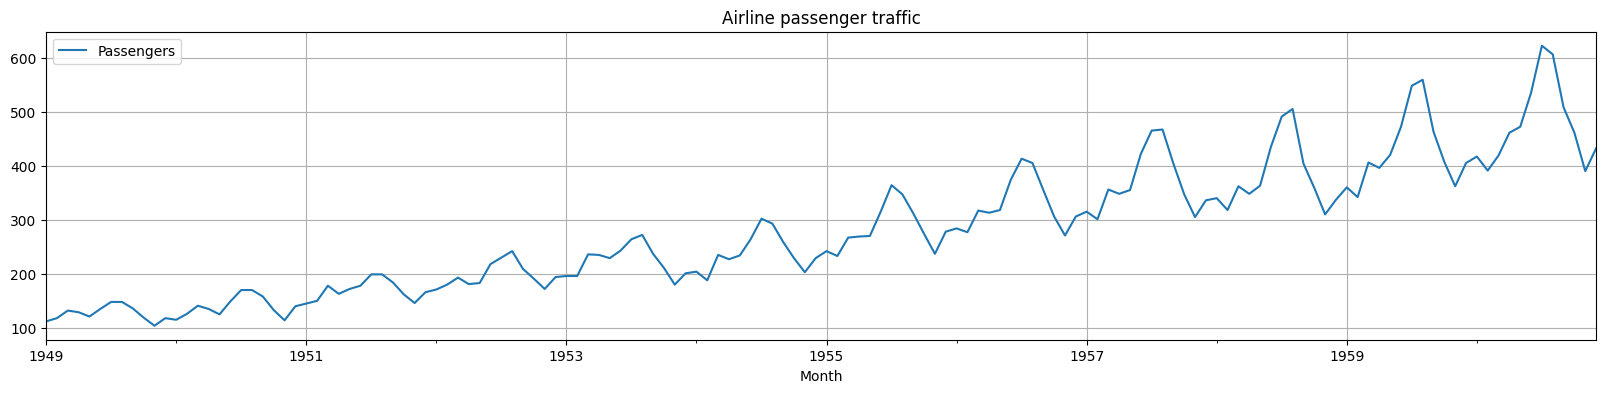

In [42]:
data.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

In [43]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [10]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()

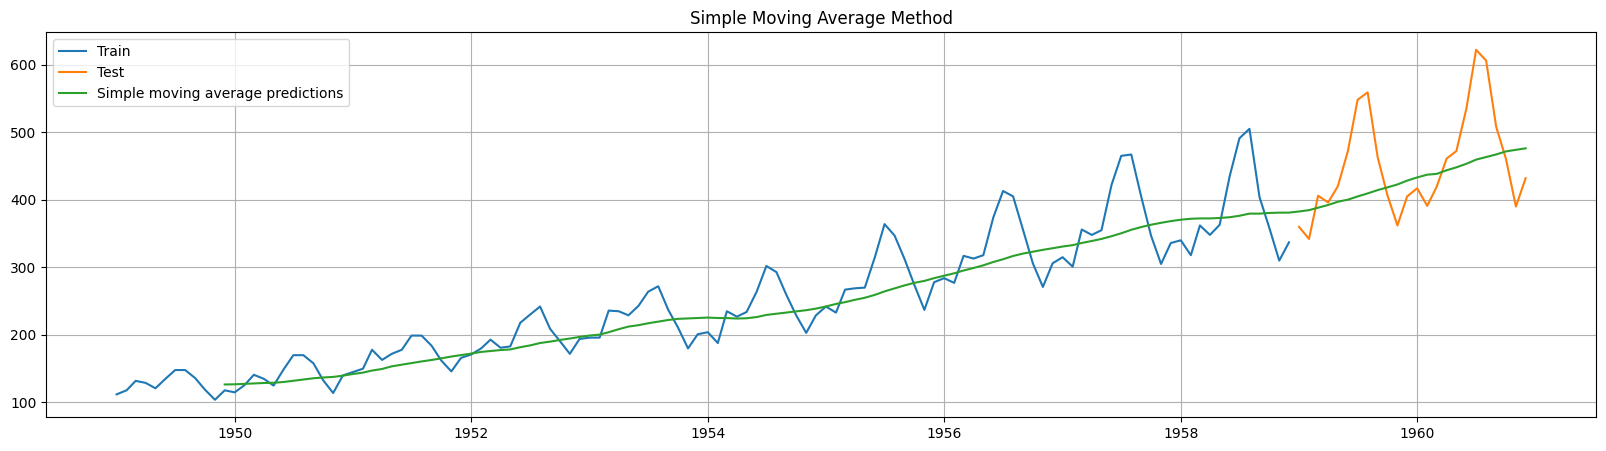

In [11]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average predictions')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [12]:
df_new=data.copy()
 

In [13]:
df_new.reset_index(inplace=True)

In [14]:
df_new

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [15]:
rolling_mean= df_new['Passengers'].rolling(window=3).mean()

In [16]:
rolling_mean

0             NaN
1             NaN
2      120.666667
3      126.333333
4      127.333333
          ...    
139    587.666667
140    578.666667
141    525.000000
142    453.000000
143    427.666667
Name: Passengers, Length: 144, dtype: float64

In [19]:
future_forecasts = []
df_future = pd.DataFrame(columns=['Date', 'Forecast'])

for i in range(10):
    last_rolling_mean = rolling_mean.iloc[-1]
    future_forecast = last_rolling_mean  # Forecasted value is the last rolling mean
    future_forecasts.append(future_forecast)

    # Append forecasted value to the data with the next date
    next_date = df_new['Month'].iloc[-1] + pd.DateOffset(months=i+1)
    new_row = pd.DataFrame({'Date': [next_date], 'Forecast': [future_forecast]})

    df_future = pd.concat([df_future, new_row], ignore_index=True)


    # print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')
    # # Recalculate rolling mean for the updated data

    # Update rolling mean for the next iteration
    rolling_mean = rolling_mean._append(pd.Series(future_forecast, index=[rolling_mean.index[-1]+1]))
    rolling_mean = rolling_mean.reset_index(drop=True).rolling(window=3).mean()


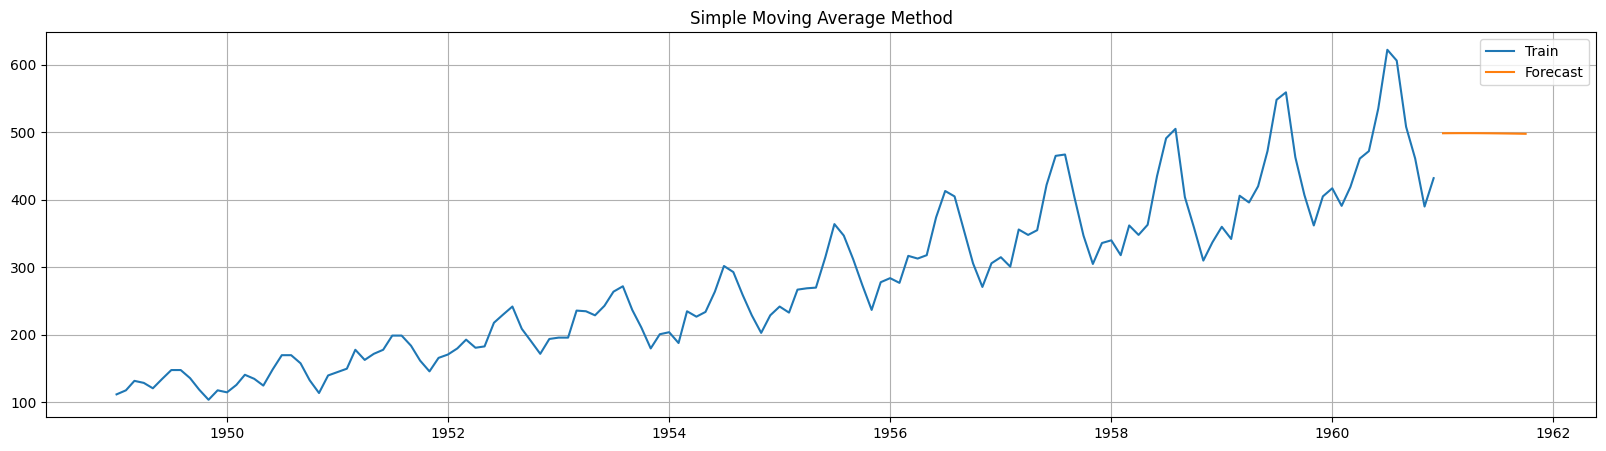

In [20]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(data['Passengers'], label='Train')
plt.plot(df_future.set_index('Date'), label='Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()